#**Python Intermediate Assignment**

##**Data preparation**

In [ ]:
# Import Library
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import statistics

ModuleNotFoundError: ignored

##**1. Load datasets**

In [ ]:
# Import Files
sheet_url_out = 'https://docs.google.com/spreadsheets/d/1Klf1IaUfOF3HvYZ541CUbvtmgs8f_MkEhVloSfdRXl0/edit#gid=1079813950'
sheet_url_out_trf = sheet_url_out.replace('/edit#gid=', '/export?format=csv&gid=')
orders = pd.read_csv(sheet_url_out_trf)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
# Import Files
sheet_url_out = 'https://docs.google.com/spreadsheets/d/1nwUZiwYpw-ezqxh_sYt5zQR0bOP8sgGqGoYesZXvLi0/edit#gid=1600373089'
sheet_url_out_trf = sheet_url_out.replace('/edit#gid=', '/export?format=csv&gid=')
payment = pd.read_csv(sheet_url_out_trf)
payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
# Import Files
sheet_url_out = 'https://docs.google.com/spreadsheets/d/1yn4RtLXuM4_q5-UvjJaIcL0KMd2p_IVKzx9e4t6Kuoc/edit#gid=411525191'
sheet_url_out_trf = sheet_url_out.replace('/edit#gid=', '/export?format=csv&gid=')
customer = pd.read_csv(sheet_url_out_trf)
customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


#**Data cleansing**

### **Cleaning Order Dataframe**

For doing analysis, it is needed to drop irrelevant column

In [ ]:
# Drop irrelevant column from order data frame
order_column = orders.columns.tolist()
order_drop = orders.drop(columns=order_column[4:6])
order_drop.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
order_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_delivered_customer_date  96476 non-null  object
 5   order_estimated_delivery_date  99441 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


`order_purchase_timestamp`, `order_delivered_customer_date`, & `order_estimated_delivery_date` is still an object, we need to cast to timeseries data type

In [ ]:
order_cast = order_drop.copy()
order_cast['order_purchase_timestamp'] = pd.to_datetime(order_cast['order_purchase_timestamp'])
order_cast['order_delivered_customer_date'] = pd.to_datetime(order_cast['order_delivered_customer_date'])
order_cast['order_estimated_delivery_date'] = pd.to_datetime(order_cast['order_estimated_delivery_date'])
order_cast.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26


In [ ]:
order_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_delivered_customer_date  96476 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


`order_purchase_timestamp`, `order_delivered_customer_date`, & `order_estimated_delivery_date` has been casted to datetime data type format

Onwards to check missing values

In [ ]:
missing_orders = order_cast.copy()
missing_orders = order_cast.isnull().sum()
percent_missing = missing_orders/len(order_cast)*100
check_missing_order = pd.DataFrame({'column_name': order_cast.columns, 'total_missing': missing_orders, 'percentage_missing': percent_missing})
check_missing_order 


,column_name,total_missing,percentage_missing
order_id,order_id,0,0.000000
customer_id,customer_id,0,0.000000
order_status,order_status,0,0.000000
order_purchase_timestamp,order_purchase_timestamp,0,0.000000
order_delivered_customer_date,order_delivered_customer_date,2965,2.981668
order_estimated_delivery_date,order_estimated_delivery_date,0,0.000000


From the conclusion there is 2.98% data missing of total rows on `order_delivered_customer_date` column. For handling the missing data, the records with `order_status` is `delivered` will be deleted and the rest will be changed to `misteri_ilahi`

In [ ]:
# Change value with order_status column's value with misteri_ilahi and delete the rows with order_status 'complete'

In [ ]:
order_drop_1 = order_cast.copy()
cond_1 = (order_drop_1['order_status'] != 'delivered')
order_drop_1.loc[order_drop_1['order_delivered_customer_date'].isnull() & cond_1, 'order_delivered_customer_date'] = 'misteri_ilahi'
order_drop_1.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    8
order_estimated_delivery_date    0
dtype: int64

We will drop the rest of missing data

In [ ]:
order_drop_2 = order_drop_1.copy()
order_drop_2 = order_drop_2.dropna()
order_drop_2.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

After handling the missing values, duplicates row will be checked based on level `order_id` which should be unique every row as **`primary key`**

In [ ]:
# check duplicates data on order_id column
order_dupe = order_drop_2.copy() 
order_dupe[order_dupe['order_id'].duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date


There is no duplicated values on level `order_id` column, it is concluded there are no duplicates

Typo check will be check on level `order_status` column

In [ ]:
order_dupe['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
# create copy dataset as final dataset order
order_clean = order_dupe.copy() 
order_clean.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26


### **Cleaning Customer Dataframe**

In [ ]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


For the analysis, irrelevant column as `customer_zip_code_prefix`

In [ ]:
# Drop irrelevant column from customer dataframe
cust_column = customer.columns.tolist()
cust_drop = customer.drop(columns=cust_column[2:3])
cust_drop.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


As duplicates value, it will be checked using `customer_id` level as **`primary key`**

In [ ]:
cust_drop[cust_drop['customer_id'].duplicated()]

,customer_id,customer_unique_id,customer_city,customer_state


There is not any duplicate value for customer DataFrame

As for missing values, it needs to be checked

In [ ]:
cust_drop.isnull().sum()

customer_id           0
customer_unique_id    0
customer_city         0
customer_state        0
dtype: int64

There is not any missing values for customer DataFrame

In [ ]:
# Check for unique value in customer_city column
cust_drop['customer_city'].unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [ ]:
# Check for unique value in customer_state column
cust_drop['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [ ]:
# Check duplicate data on customer_id column
cust_drop[cust_drop['customer_id'].duplicated()]

,customer_id,customer_unique_id,customer_city,customer_state


Finally, the Customer is cleaned

In [ ]:
# Create copy dataset as final customer dataset
cust_clean = cust_drop.copy()
cust_clean.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


For the analysis, Payment DataFrame is being cleaning

###**Cleaning Payment DataFrame**

In [ ]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
payment_cast = payment.copy()
payment_cast['payment_sequential'] = payment_cast['payment_sequential'].astype('str')
payment_cast['payment_installments'] = payment_cast['payment_installments'].astype('str')
payment_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  object 
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  object 
 4   payment_value         103886 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.0+ MB


Now, it needs to be check for `payment_sequential`, `payment_type` and `payment_installments` columns

In [ ]:
print('unique value for payment_type')
print(payment_cast['payment_type'].unique())
print('--------------------------------------')
print('unique value for payment_sequential')
print(payment_cast['payment_sequential'].unique())
print('--------------------------------------')
print('unique value for payment_installments')
print(payment_cast['payment_installments'].unique())

unique value for payment_type
['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']
--------------------------------------
unique value for payment_sequential
['1' '2' '4' '5' '3' '8' '6' '7' '10' '11' '17' '19' '27' '12' '9' '15'
 '13' '14' '16' '25' '22' '26' '29' '28' '18' '21' '24' '23' '20']
--------------------------------------
unique value for payment_installments
['8' '1' '2' '3' '6' '5' '4' '10' '7' '12' '9' '13' '15' '24' '11' '18'
 '14' '20' '21' '17' '22' '0' '16' '23']


There is no typo/error in categorical columns, so next on the step 

In [ ]:
#check if there is any missing data in payment_cast
payment_cast.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

There isn't any missing values

In [ ]:
#check if there is any duplicates on order_id level
payment_cast[payment_cast['order_id'].duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


there are 4446 rows duplicated on order_id level, so it will be dropped

In [ ]:
payment_dupe = payment_cast.copy()
payment_dupe = payment_dupe.drop_duplicates(subset=['order_id'])
payment_dupe.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Confirmation total rows before and after cleaning duplicates
print("total rows before duplicate cleansing")
print(len(payment_cast))
print('-----------------------------------------')
print("total rows after duplicate cleansing")
print(len(payment_dupe))

total rows before duplicate cleansing
103886
-----------------------------------------
total rows after duplicate cleansing
99440


In [ ]:
#Create Cleaned Dataset as Final Dataset
payment_clean = payment_dupe.copy()
payment_clean.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


###**Join Datasets**

All three cleaned dataset will be joined before handling outliers data

In [ ]:
df_join = order_clean.merge(cust_clean, on='customer_id').merge(payment_clean, on='order_id' )
df_join.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62


In [ ]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99432 entries, 0 to 99431
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99432 non-null  object        
 1   customer_id                    99432 non-null  object        
 2   order_status                   99432 non-null  object        
 3   order_purchase_timestamp       99432 non-null  datetime64[ns]
 4   order_delivered_customer_date  99432 non-null  object        
 5   order_estimated_delivery_date  99432 non-null  datetime64[ns]
 6   customer_unique_id             99432 non-null  object        
 7   customer_city                  99432 non-null  object        
 8   customer_state                 99432 non-null  object        
 9   payment_sequential             99432 non-null  object        
 10  payment_type                   99432 non-null  object        
 11  payment_install

###**Handling Outliers**

After we have our final datasets, we will check for outliers `payment_value` column

In [ ]:
df_outliers = df_join.copy()
q1 = df_outliers['payment_value'].quantile(0.25)
q3 = df_outliers['payment_value'].quantile(0.75)
iqr = q3 - q1
c_min = q1 - 1.5*iqr
c_max = q3 + 1.5*iqr
print('Q1:',q1)
print('Q3:',q3)
print('IQR:', iqr)
print('Min:',c_min)
print('Max:',c_max)

Q1: 60.05
Q3: 175.115
IQR: 115.06500000000001
Min: -112.54750000000003
Max: 347.71250000000003


In [ ]:
print('Rows before outlier cleansing',len(df_join))

#Remove outliers
df_outliers = df_outliers[(df_outliers['payment_value'] > c_min) & (df_outliers['payment_value'] < c_max)]
print('total rows after outlier cleansing', len(df_outliers))

Rows before outlier cleansing 99432
total rows after outlier cleansing 91662


There are 7770 rows cleaned from outliers

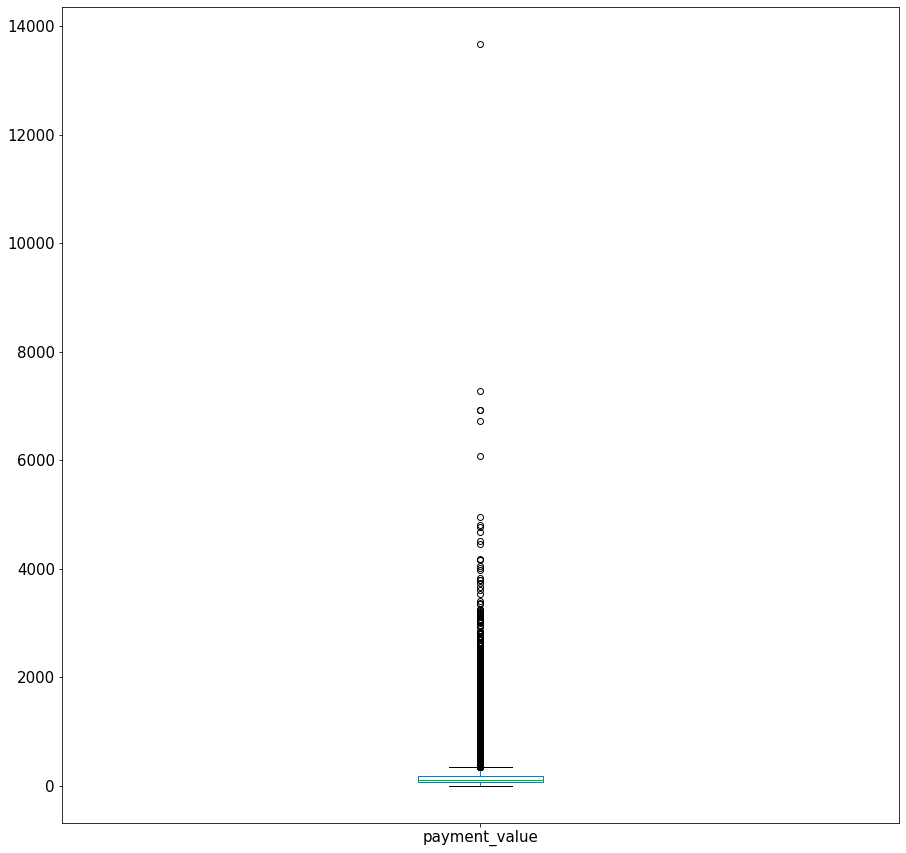

In [ ]:
#before outlier removal
df_join.boxplot(column = 'payment_value',fontsize=15,rot=0,grid=False,figsize=(15,15))


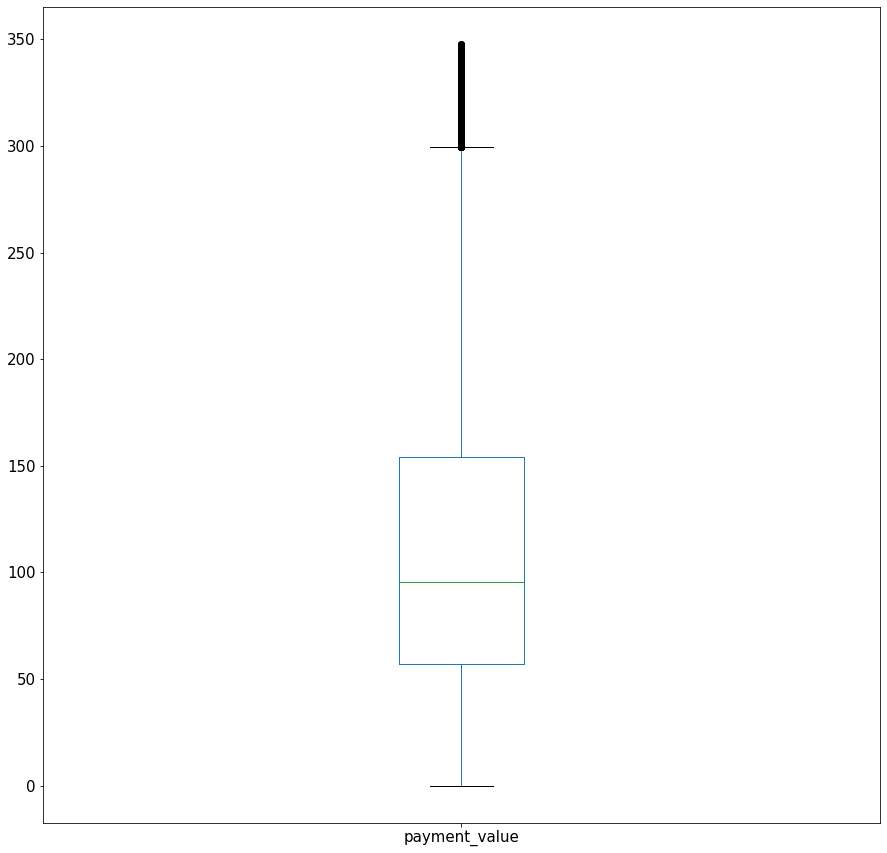

In [ ]:
#After Outlier cleansing
df_outliers.boxplot(column = 'payment_value',fontsize=15,rot=0,grid=False,figsize=(15,15))

After outlier cleansing, for final confirmation, value for each categorical column will be checked

In [ ]:
cat_column = ['payment_sequential', 'payment_type']
for i in cat_column:
    rows_count = df_outliers[i].value_counts()
    print(rows_count, '\n')

1     90079
2      1306
3       150
4        54
5        24
6        20
7         9
8         7
10        5
11        2
14        1
27        1
15        1
17        1
19        1
9         1
Name: payment_sequential, dtype: int64 

credit_card    69029
boleto         18514
voucher         2673
debit_card      1443
not_defined        3
Name: payment_type, dtype: int64 



In [ ]:
#value 'not_defined' will be removed

remove_value = df_outliers[df_outliers['payment_type'].isin(['credit_card', 'boleto', 'voucher', 'debit_card'])]
remove_value.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62


In [ ]:
#final dataset
df_final = remove_value.copy()
df_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91659 entries, 0 to 99431
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       91659 non-null  object        
 1   customer_id                    91659 non-null  object        
 2   order_status                   91659 non-null  object        
 3   order_purchase_timestamp       91659 non-null  datetime64[ns]
 4   order_delivered_customer_date  91659 non-null  object        
 5   order_estimated_delivery_date  91659 non-null  datetime64[ns]
 6   customer_unique_id             91659 non-null  object        
 7   customer_city                  91659 non-null  object        
 8   customer_state                 91659 non-null  object        
 9   payment_sequential             91659 non-null  object        
 10  payment_type                   91659 non-null  object        
 11  payment_install

##**Descriptive Analysis**

For descriptive analysis, `payment_value` column will be used in this case

For further information, `order_delivery_time` will be added later to calculate descriptive analysis

###**Payment Value variables**

####**Count, mean, S.dev. Max, Min, Q1, median, Q3**

In [ ]:
df_final.describe()

,payment_value
count,91659.000000
mean,113.412471
std,72.603936
min,0.010000
25%,57.110000
50%,95.370000
75%,154.100000
max,347.700000


* Total record of all cleaned dataset is 91,659 rows.
* Average of payment value is 113.4
* Standard deviation for payment value is 72.6
* The median of payment value (95.37) < average of the dataset (113.4)
* The values of payment value are quite spread widely.

---


####**Range**

In [ ]:
range_pay = max(df_final['payment_value'])-min(df_final['payment_value'])
print('range payment_value :', range_pay)

range payment_value : 347.69


The range of payment value is quite large, eventough the minimum value is 0 which means the transaction is failed/ not successful, by looking at the range of Q1 and maximum value, it still quite large.

---


####**Variance**

In [ ]:
var_pay = statistics.variance(df_final['payment_value'])
print('Variance payment_value :', var_pay)

Variance payment_value : 5271.331544922897


The payment value is widely spread within the range of the data

---

####**Coefficient of Variance (std/mean)**

In [ ]:
cov_pay = np.std(df_final['payment_value'])/np.mean(df_final['payment_value'])
print('Coef. of var payment_value :', cov_pay)

Coef. of var payment_value : 0.6401724546982895


####**Skewness**

In [ ]:
df_final.skew(numeric_only = True)

payment_value    1.014957
dtype: float64

The data has positive skewness

---

####**Kurtosis**

In [ ]:
df_final.kurtosis(numeric_only = True)

payment_value    0.508902
dtype: float64

Payment value data flat relatively to normal distribution

###**Delivery time variables**

For delivery time variables, new table was created which only consisting rows for `order_status` = 'delivered'. Then we calculate time difference between `order_delivery_customer_date` column and `order_purchase_timestamp` column 

In [ ]:
df_deliver = df_final[df_final['order_status']=='delivered']
df_deliver.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62


In [ ]:
df_deliver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89037 entries, 0 to 99431
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89037 non-null  object        
 1   customer_id                    89037 non-null  object        
 2   order_status                   89037 non-null  object        
 3   order_purchase_timestamp       89037 non-null  datetime64[ns]
 4   order_delivered_customer_date  89037 non-null  object        
 5   order_estimated_delivery_date  89037 non-null  datetime64[ns]
 6   customer_unique_id             89037 non-null  object        
 7   customer_city                  89037 non-null  object        
 8   customer_state                 89037 non-null  object        
 9   payment_sequential             89037 non-null  object        
 10  payment_type                   89037 non-null  object        
 11  payment_install

In [ ]:
df_deliver['order_delivered_customer_date'] = pd.to_datetime(df_deliver['order_delivered_customer_date'])
df_deliver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89037 entries, 0 to 99431
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89037 non-null  object        
 1   customer_id                    89037 non-null  object        
 2   order_status                   89037 non-null  object        
 3   order_purchase_timestamp       89037 non-null  datetime64[ns]
 4   order_delivered_customer_date  89037 non-null  datetime64[ns]
 5   order_estimated_delivery_date  89037 non-null  datetime64[ns]
 6   customer_unique_id             89037 non-null  object        
 7   customer_city                  89037 non-null  object        
 8   customer_state                 89037 non-null  object        
 9   payment_sequential             89037 non-null  object        
 10  payment_type                   89037 non-null  object        
 11  payment_install

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_deliver['order_delivery_time'] = df_deliver['order_delivered_customer_date'] - df_deliver['order_purchase_timestamp']
df_deliver['order_delivery_time'] = df_deliver['order_delivery_time'].dt.days
df_deliver.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62,2


In [ ]:
#outliers
q1_deliver = df_deliver['order_delivery_time'].quantile(0.25)
q3_deliver = df_deliver['order_delivery_time'].quantile(0.75)
iqr_deliver = q3 - q1 
d_min = q1 - 1.5*iqr_deliver
d_max = q3 + 1.5*iqr_deliver
print('Q1: ',q1_deliver)
print('Q3: ',q3_deliver)
print('IQR: ',iqr_deliver)
print('Min: ',d_min)
print('Max: ',d_max)

Q1:  6.0
Q3:  15.0
IQR:  115.06500000000001
Min:  -112.54750000000003
Max:  347.71250000000003


In [ ]:
print('Rows before outlier cleansing',len(df_deliver))

#Outlier cleansing
df_deliver = df_deliver[(df_deliver['order_delivery_time'] > d_min) & (df_deliver['order_delivery_time'] < d_max)]
print('total rows after outlier cleansing', len(df_deliver))

Rows before outlier cleansing 89037
total rows after outlier cleansing 89037


There hasn't any outliers in `order_delivery_time` variables

In [ ]:
df_deliver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89037 entries, 0 to 99431
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89037 non-null  object        
 1   customer_id                    89037 non-null  object        
 2   order_status                   89037 non-null  object        
 3   order_purchase_timestamp       89037 non-null  datetime64[ns]
 4   order_delivered_customer_date  89037 non-null  datetime64[ns]
 5   order_estimated_delivery_date  89037 non-null  datetime64[ns]
 6   customer_unique_id             89037 non-null  object        
 7   customer_city                  89037 non-null  object        
 8   customer_state                 89037 non-null  object        
 9   payment_sequential             89037 non-null  object        
 10  payment_type                   89037 non-null  object        
 11  payment_install

####**Count, mean, S.dev. Max, Min, Q1, median, Q3**

In [ ]:
df_deliver['order_delivery_time'].describe()

count    89037.000000
mean        11.949661
std          9.398861
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: order_delivery_time, dtype: float64

* Total record of delivered order is 89,030 rows.
* Average of delivery time is 11 days
* Standard deviation for delivery time is 9
* The median of delivery time (10) < average of the dataset (11)
* The values of delivery time are not spread widely.

---


####**Variance**

In [ ]:
var_time = statistics.variance(df_deliver['order_delivery_time'])
print('Variance order_delivery_time: ',var_time)

Variance order_delivery_time:  88.33858644020967


####**Coefficient of Variance (std/mean)**

In [ ]:
cov_time = np.std(df_deliver['order_delivery_time'])/np.mean(df_deliver['order_delivery_time'])
print('Coefficient of Variance order_delivery_time: ',cov_time)

Coefficient of Variance order_delivery_time:  0.7865334284159593


####**Skewness**

In [ ]:
df_deliver.skew(numeric_only = True)

payment_value          1.016149
order_delivery_time    3.740116
dtype: float64

Delivery time data has positive skewness

####**Kurtosis**

In [ ]:
df_deliver.kurtosis(numeric_only = True)

payment_value           0.515701
order_delivery_time    37.894648
dtype: float64

Delivery time data has peaked to normal distibution

##**EDA & Data Visualization**

###**Numbers of Orders per month**

In [ ]:
df_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62


In [ ]:
# Create column of month-year
df_final['month'] = pd.DatetimeIndex(df_final['order_purchase_timestamp']).month
df_final['year'] = pd.DatetimeIndex(df_final['order_purchase_timestamp']).year
df_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12,8,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20,11,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62,2,2018


In [ ]:
#create data frame from EDA
eda1 = df_final.groupby(['year', 'month'])['order_id'].count()
eda1 = pd.DataFrame(eda1)
eda1.reset_index(inplace=True)
eda1['month_year'] = eda1['month'].astype(str)+'/'+eda1['year'].astype(str)
eda1

,year,month,order_id,month_year
0,2016,9,3,9/2016
1,2016,10,285,10/2016
2,2016,12,1,12/2016
3,2017,1,706,1/2017
4,2017,2,1632,2/2017
5,2017,3,2458,3/2017
6,2017,4,2195,4/2017
7,2017,5,3408,5/2017
8,2017,6,3011,6/2017
9,2017,7,3758,7/2017


In [ ]:
eda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        25 non-null     int64 
 1   month       25 non-null     int64 
 2   order_id    25 non-null     int64 
 3   month_year  25 non-null     object
dtypes: int64(3), object(1)
memory usage: 928.0+ bytes


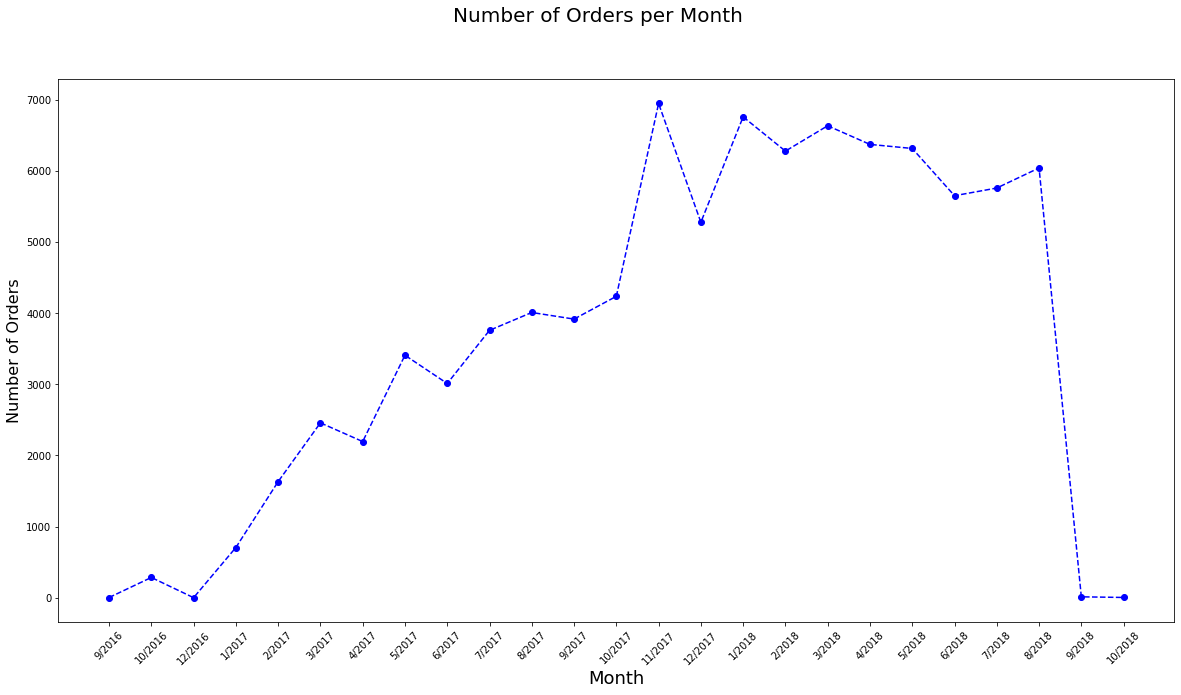

In [ ]:
# Create timeline chart
fig = plt.figure(figsize=(20,10))
fig.suptitle('Number of Orders per Month', fontsize=20) #judul
plt.xlabel('Month',fontsize=18) #X-axis
plt.ylabel('Number of Orders',fontsize=16) #Y-axis
plt.xticks(rotation=45) #ticks
x = eda1['month_year'] #X-value
y = eda1['order_id'] #Y-value
plt.plot(x,y,'bo--') #type of chart
plt.show()

**Insights**
1. The total orders trend during the period (Sep 2016 - Aug 2018) tends to increase
2. There is very significant drop of total orders in Sep 2018 to Oct 2018, from the drop, it is speculated the data hasn't yet inputed causing an error to the analysis. Yet, further analysis need to be conducted to confirm
3. There are several month which order spiked (May 2017, Nov 2017, and Jan 2018). The cause of the `spiking` needs a further treatment to get a sharper findings

###**Daily Order Trend**

In [ ]:
#Create days column
df_final['days'] = df_final['order_purchase_timestamp'].dt.day_name()
df_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,month,year,days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12,10,2017,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46,7,2018,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12,8,2018,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20,11,2017,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62,2,2018,Tuesday


In [ ]:
#Create dataframe for analysis
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
eda2 = df_final.groupby('days')['order_id'].count().reindex(week_day)
eda2 = pd.DataFrame(eda2)
eda2.reset_index(inplace=True)
eda2.columns = ['days','number_of_orders']
eda2

,days,number_of_orders
0,Monday,14899
1,Tuesday,14737
2,Wednesday,14311
3,Thursday,13605
4,Friday,12975
5,Saturday,10019
6,Sunday,11113


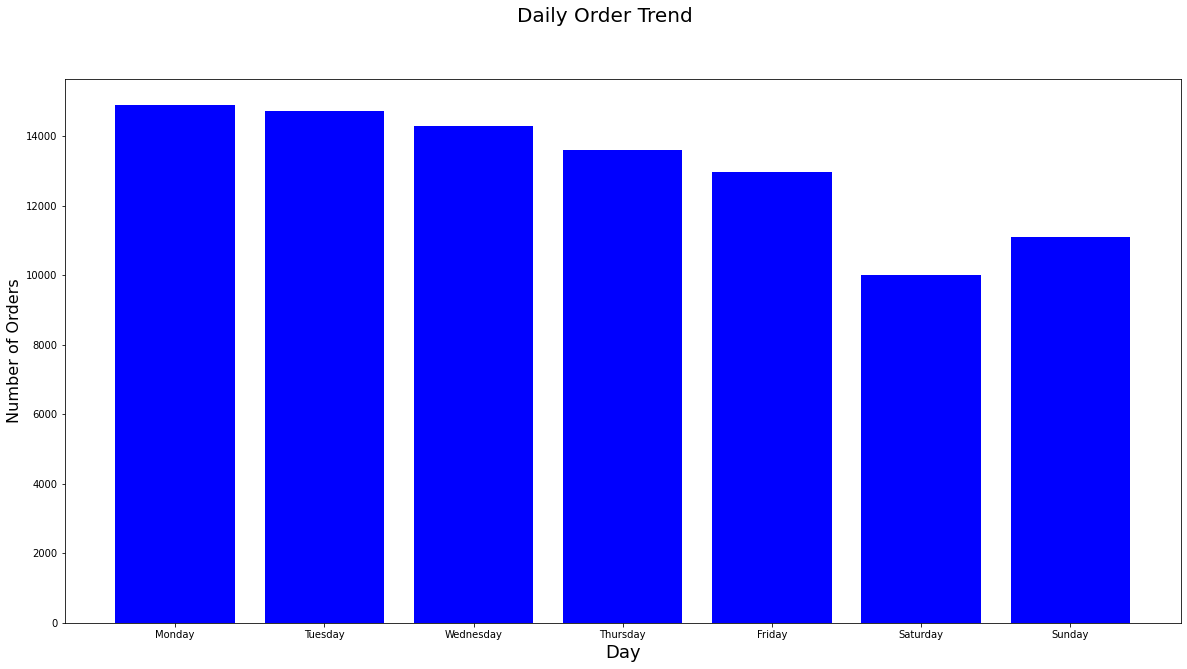

In [ ]:
fig = plt.figure(figsize=(20, 10))

fig.suptitle('Daily Order Trend', fontsize=20)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Number of Orders', fontsize=16)

x = eda2['days']
y = eda2['number_of_orders']
plt.bar(x, y,color='#0000FF')
plt.show()

**Insight**
1. Most of the transaction occurs on Weekdays, especially on monday, while on weekends tends to drops especially on Saturday
2. Though Monday have the most transaction, it is relatively equal to tuesday on wednesday.
3. The order trends tends to drop through the week

###**Percentage of Orders Per Payment Type**

In [ ]:
# Create dataframe for analysis
eda3 = df_final.groupby('payment_type')['order_id'].count()
eda3 = pd.DataFrame(eda3)
eda3.reset_index(inplace=True)
eda3.columns = ['payment_type','number_of_orders']
eda3

,payment_type,number_of_orders
0,boleto,18514
1,credit_card,69029
2,debit_card,1443
3,voucher,2673


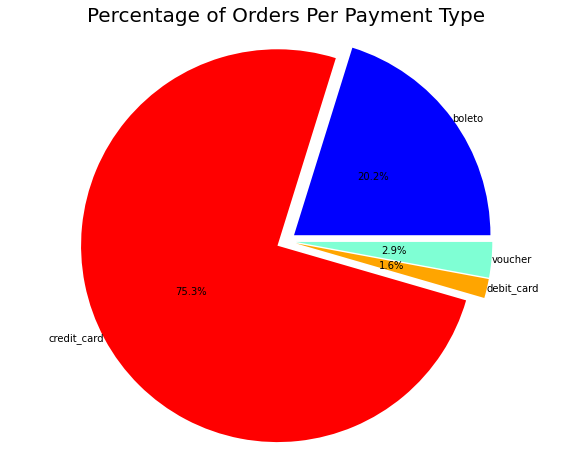

In [ ]:
plt.figure(figsize=(10, 8))
data = eda3['number_of_orders'] #data-input
labels = eda3['payment_type'] #data-label
explode = [0.05,0.05,0.05,0.05] #Explode range
colors = ['#0000FF','#FF0000','#FFA500','aquamarine'] #colors
plt.pie(data,labels=labels,autopct='%1.1f%%',explode=explode,pctdistance=0.5,labeldistance=1,colors=colors) #chart_properties
plt.title('Percentage of Orders Per Payment Type', fontsize=20) #title
plt.axis('equal')
plt.show()

**Insight**
75.3% of the total orders are paid with `credit_card`. While `boleto` in the runner-up place for payment option. `Vouchers` and `debit_card` are the least popular payment method for the customer to get the transaction done

#**Python Advanced Assignment - Customer Segmentation**

### **Customer Segementation**

In [ ]:
#import Silhouette
from silhoutte import silhoutte_analysis

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91659 entries, 0 to 99431
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       91659 non-null  object        
 1   customer_id                    91659 non-null  object        
 2   order_status                   91659 non-null  object        
 3   order_purchase_timestamp       91659 non-null  datetime64[ns]
 4   order_delivered_customer_date  91659 non-null  object        
 5   order_estimated_delivery_date  91659 non-null  datetime64[ns]
 6   customer_unique_id             91659 non-null  object        
 7   customer_city                  91659 non-null  object        
 8   customer_state                 91659 non-null  object        
 9   payment_sequential             91659 non-null  object        
 10  payment_type                   91659 non-null  object        
 11  payment_install

Customer will be segemented based on RFM analysis (Recency, Frequency, Monetary). First new dataframe for each `customer_unique_id` will be created that contains recency, frequency, and total spend records

In [ ]:
df_cluster = df_final.copy()
relevant_column = ['order_id','customer_unique_id','order_purchase_timestamp','payment_value']
df_cluster = df_cluster[(relevant_column)]
df_cluster.head()

,order_id,customer_unique_id,order_purchase_timestamp,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,28.62


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91659 entries, 0 to 99431
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  91659 non-null  object        
 1   customer_unique_id        91659 non-null  object        
 2   order_purchase_timestamp  91659 non-null  datetime64[ns]
 3   payment_value             91659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.5+ MB


In [ ]:
df_cluster['customer_unique_id'].nunique()

88662

Now we will create dataframe with recency records on each `customer_unique_id`

####**Recency**

In [ ]:
df_recent = df_cluster.loc[df_cluster.groupby('customer_unique_id')['order_purchase_timestamp'].idxmax(),:].reset_index()
df_recent['recency'] = (df_recent['order_purchase_timestamp'].max()-df_recent['order_purchase_timestamp']).dt.days
df_recent = df_recent[['customer_unique_id','recency']]
df_recent.head()

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163
2,0000f46a3911fa3c0805444483337064,585
3,0000f6ccb0745a6a4b88665a16c9f078,369
4,0004aac84e0df4da2b147fca70cf8255,336


In [ ]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88662 entries, 0 to 88661
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  88662 non-null  object
 1   recency             88662 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


After recency, we will create another dataframe with frequency column on each `customer_unique_id`

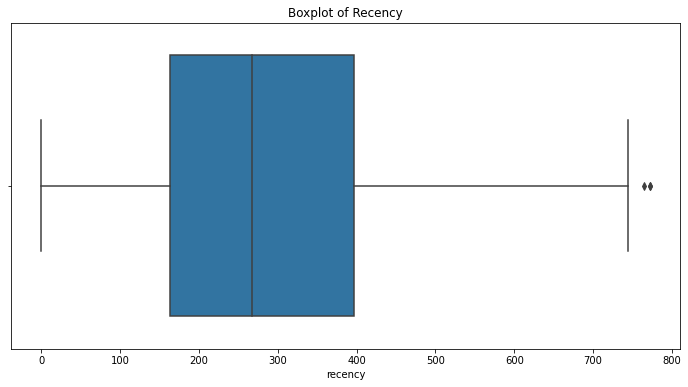

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='recency', data=df_recent)
plt.title('Boxplot of Recency');

####**Frequency**

In [ ]:
df_freq = df_cluster.groupby(['customer_unique_id']).count()
df_freq =pd.DataFrame(df_freq).reset_index()
df_freq = df_freq[['customer_unique_id','order_id']]
df_freq.rename(columns={'order_id':'total_orders'},inplace=True)
df_freq.head()

,customer_unique_id,total_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [ ]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88662 entries, 0 to 88661
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  88662 non-null  object
 1   total_orders        88662 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


Last, we will create datafram containing total spend record for each `customer_unique_id`

In [ ]:
df_freq['total_orders'].value_counts(normalize=True)*100

1     96.961494
2      2.789245
3      0.204146
4      0.027069
5      0.006767
6      0.005639
7      0.003384
8      0.001128
17     0.001128
Name: total_orders, dtype: float64

frequency values that are greater than 5 will be filtered, because by doing this values with 0.11% will be dropped **of** records

In [ ]:
df_freq['total_orders'].apply(lambda x: 'less or equal to 5' if x<=5 else 'greater than 5')\
                .value_counts(normalize=True) * 100

less or equal to 5    99.988721
greater than 5         0.011279
Name: total_orders, dtype: float64

In [ ]:
df_freq = df_freq[df_freq['total_orders'] <= 5]

####**Monetary**

In [ ]:
df_money = df_cluster.groupby(['customer_unique_id']).sum()
df_money = pd.DataFrame(df_money).reset_index()
df_money.head()

,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [ ]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88662 entries, 0 to 88661
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  88662 non-null  object 
 1   payment_value       88662 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
df_money['payment_value'].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    88662.000000
mean       117.246100
std         77.899327
min          0.010000
25%         58.090000
50%         98.000000
75%        158.460000
90%        226.120000
95%        274.536500
99%        338.460000
max       1122.720000
Name: payment_value, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


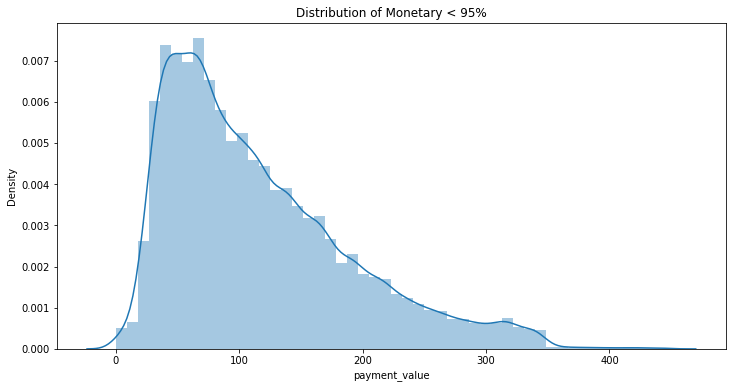

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Monetary < 95%')
sns.distplot(df_money[df_money['payment_value']<447].payment_value);

In [ ]:
df_money = df_money[df_money['payment_value'] < 447]

All the dataframe will be joined

In [ ]:
cluster_join = df_recent.merge(df_freq,on='customer_unique_id').merge(df_money,on='customer_unique_id')
cluster_join.head()

,customer_unique_id,recency,total_orders,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89


In [ ]:
cluster_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88475 entries, 0 to 88474
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  88475 non-null  object 
 1   recency             88475 non-null  int64  
 2   total_orders        88475 non-null  int64  
 3   payment_value       88475 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.4+ MB


### **Remove the Outliers**

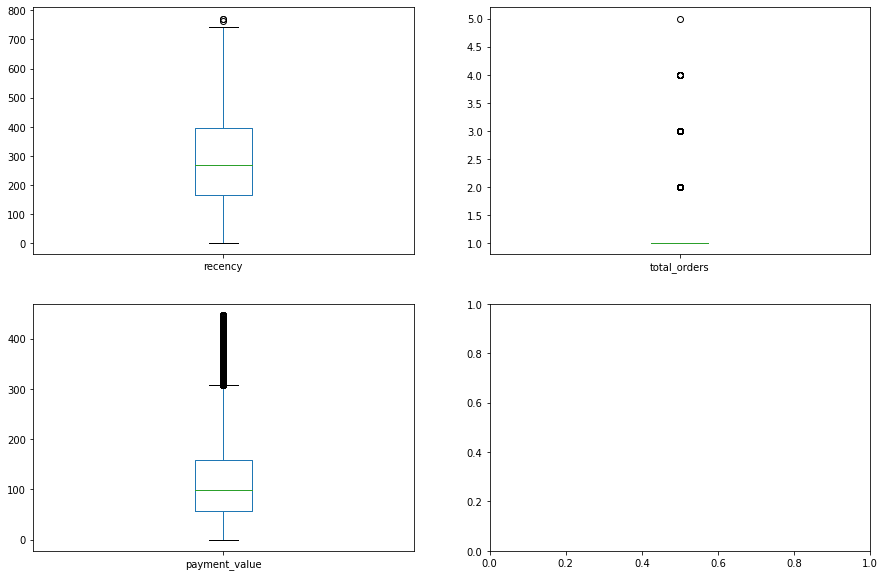

In [ ]:
## Checking for outliers
numerical_col = ['recency','total_orders','payment_value']

fig,axes = plt.subplots(nrows=2, ncols = 2, figsize=(15,10))
for i, el in enumerate(numerical_col):
  a = cluster_join.boxplot(el,ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
cluster_outliers = cluster_join.copy()

# Define function for checking outliers
def check_outliers(data,col_name):
  q1 = data[col_name].quantile(0.25)
  q3 = data[col_name].quantile(0.75)
  iqr = q3 - q1
  c_min = q1 - 1.5*iqr
  c_max = q3 + 1.5*iqr
  print('Q1: ',q1)
  print('Q3: ',q3)
  print('IQR: ',iqr)
  print('Min: ',c_min)
  print('Max: ',c_max)

Checking for outliers on `recency` column then remove the outliers

In [ ]:
check_outliers(cluster_outliers,'recency')

Q1:  164.0
Q3:  397.0
IQR:  233.0
Min:  -185.5
Max:  746.5


In [ ]:
print('Total rows before remove outliers ',len(cluster_join))

# Remove the outliers
cluster_outliers = cluster_outliers[(cluster_outliers['recency'] >= -185.5) & (cluster_outliers['recency'] < 746.5)]
print('Total rows after remove outliers ',len(cluster_outliers))

Total rows before remove outliers  88475
Total rows after remove outliers  88472


From the cleansing there are 3 columns that is dropped

In [ ]:
check_outliers(cluster_outliers,'total_orders')

Q1:  1.0
Q3:  1.0
IQR:  0.0
Min:  1.0
Max:  1.0


Most of the customers (without outliers) only order 1 time in a time. We will drop rows with `total_orders` > 6 (far away from Max value).

In [ ]:
# Remove the outliers
cluster_outliers = cluster_outliers[cluster_outliers['total_orders'] <= 6]
print('Total rows after remove outliers ',len(cluster_outliers))

Total rows after remove outliers  88472


From the cleansing there are 5 columns that is dropped

Next the outliers from `payment_value` column to be cleaned

In [ ]:
check_outliers(cluster_outliers,'payment_value')

Q1:  58.0
Q3:  158.01
IQR:  100.00999999999999
Min:  -92.01499999999999
Max:  308.025


In [ ]:
# Remove the outliers
cluster_outliers = cluster_outliers[(cluster_outliers['payment_value'] >= -92.47) & (cluster_outliers['payment_value'] < 309)]
print('Total rows after remove outliers ',len(cluster_outliers))

Total rows after remove outliers  86203


2450 rows are dropped due to sanity checks 

All the dataframe cleaned will be illustrated in boxplot

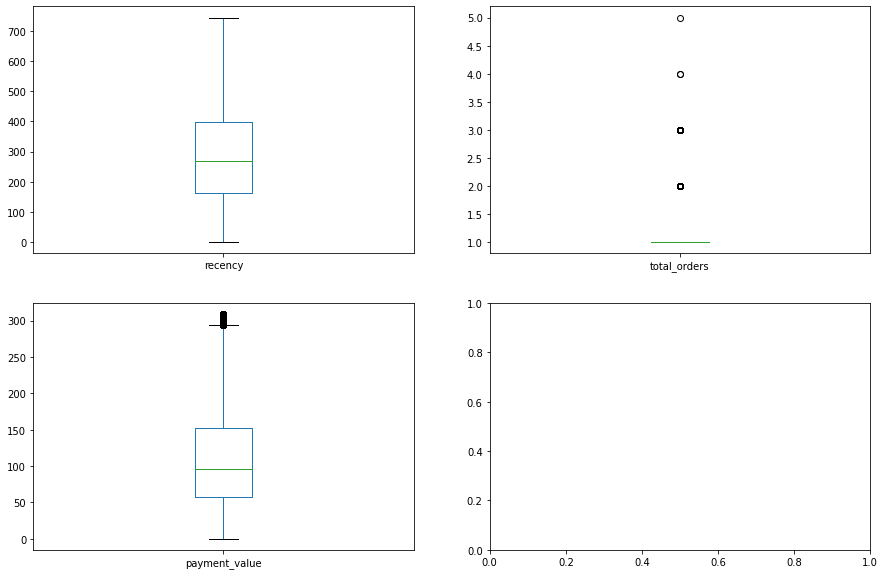

In [ ]:
numerical_col = ['recency','total_orders','payment_value']

fig,axes = plt.subplots(nrows=2, ncols = 2, figsize=(15,10))  #frames
for i, el in enumerate(numerical_col):
  a = cluster_outliers.boxplot(el,ax=axes.flatten()[i],grid=False) #function
plt.show()

In [ ]:
cluster_clean = cluster_outliers.copy()
cluster_clean.head()

,customer_unique_id,recency,total_orders,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89


### **Scaling All The Numeric Columns**

In [ ]:
numerical_col

['recency', 'total_orders', 'payment_value']

In [ ]:
cluster_scale = cluster_clean.copy()
scaler = MinMaxScaler()
cluster_scale[numerical_col] = scaler.fit_transform(cluster_scale[numerical_col])
cluster_scale

,customer_unique_id,recency,total_orders,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,0.215054,0.0,0.459265
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.219086,0.0,0.087975
2,0000f46a3911fa3c0805444483337064,0.786290,0.0,0.279042
3,0000f6ccb0745a6a4b88665a16c9f078,0.495968,0.0,0.141156
4,0004aac84e0df4da2b147fca70cf8255,0.451613,0.0,0.637255
...,...,...,...,...
88470,fffbf87b7a1a6fa8b03f081c5f51a201,0.393817,0.0,0.541544
88471,fffea47cd6d3cc0a88bd621562a9d061,0.416667,0.0,0.273734
88472,ffff371b4d645b6ecea244b27531430a,0.829301,0.0,0.363975
88473,ffff5962728ec6157033ef9805bacc48,0.225806,0.0,0.432691


### **Clustering Analysis**

#### **Determine Cluster Number**

To determine cluster number, 2 method will be used:
* Elbow method
* Silhouette Analysis

##### **Elbow Method**

In [ ]:
### Drop the column that are not needed
cluster_check = cluster_scale.copy()
cluster_check = cluster_scale.drop(['customer_unique_id'],axis=1)
cluster_check.head()

,recency,total_orders,payment_value
0,0.215054,0.0,0.459265
1,0.219086,0.0,0.087975
2,0.786290,0.0,0.279042
3,0.495968,0.0,0.141156
4,0.451613,0.0,0.637255


The cluster range to check is from 2 to 10 which is range that make sense for business.

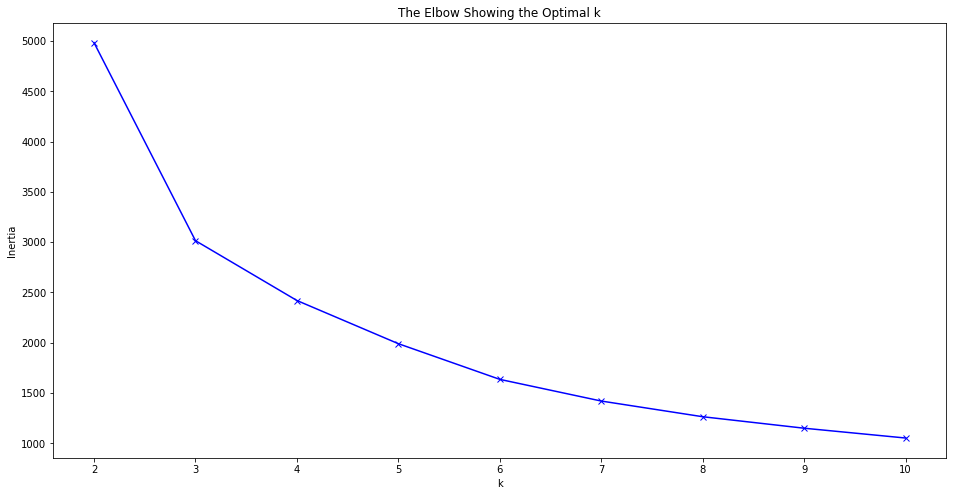

In [ ]:
distortions = []
K = range(2,11)
for k in K:
  kmeanModel = cluster.KMeans(n_clusters=k)
  kmeanModel.fit(cluster_check)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Showing the Optimal k')
plt.show()

#####**Sillhouette Analysis**


For n_clusters = 2 The average silhouette_score is : 0.3706269615010975
For n_clusters = 3 The average silhouette_score is : 0.39780989661919663
For n_clusters = 4 The average silhouette_score is : 0.37516572425884676
For n_clusters = 5 The average silhouette_score is : 0.34092780954066204
For n_clusters = 6 The average silhouette_score is : 0.34745470175994725
For n_clusters = 7 The average silhouette_score is : 0.3518640560697033
For n_clusters = 8 The average silhouette_score is : 0.34759985859659287
For n_clusters = 9 The average silhouette_score is : 0.3474679527826086
For n_clusters = 10 The average silhouette_score is : 0.3331230040809043


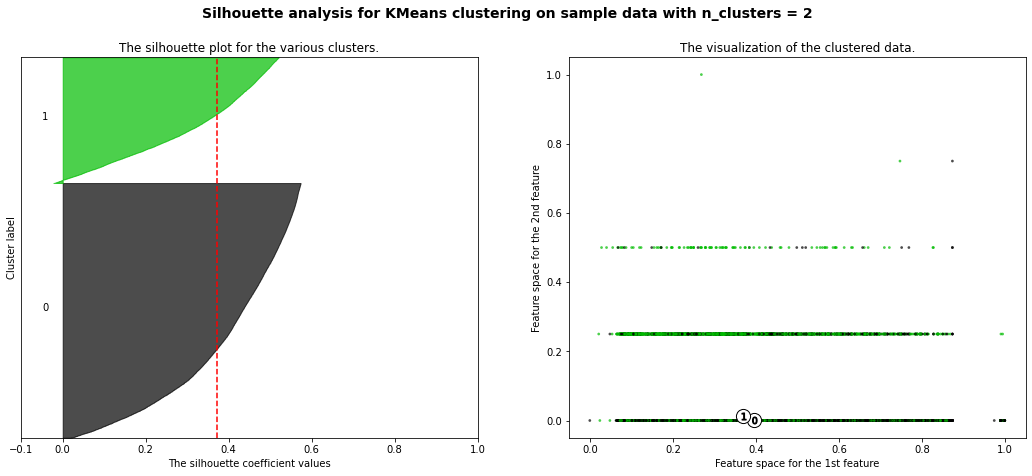

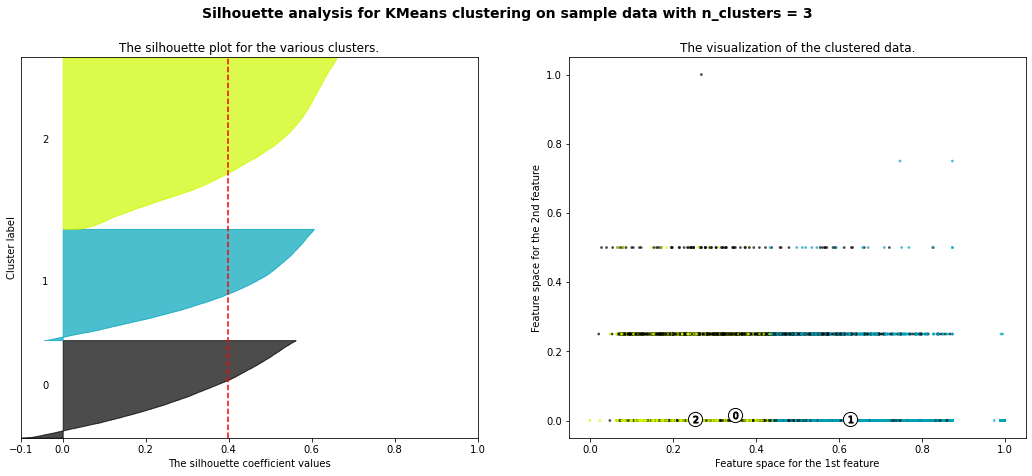

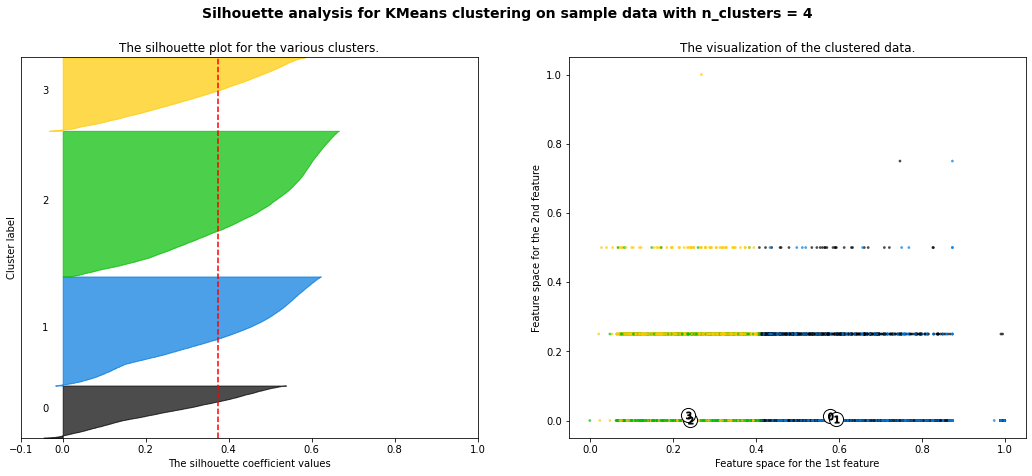

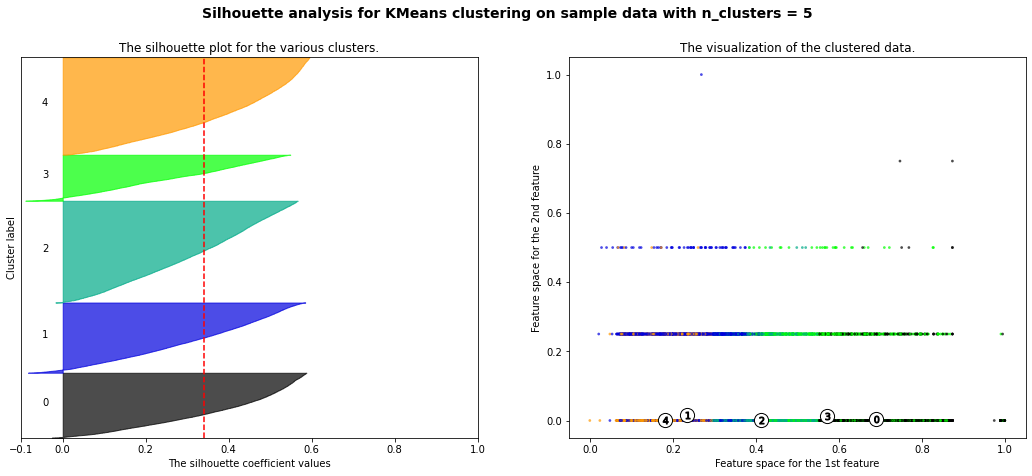

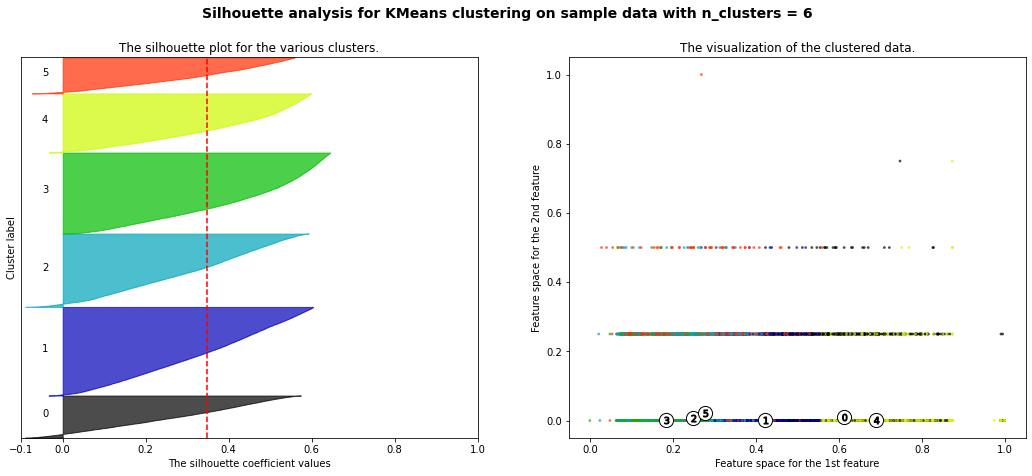

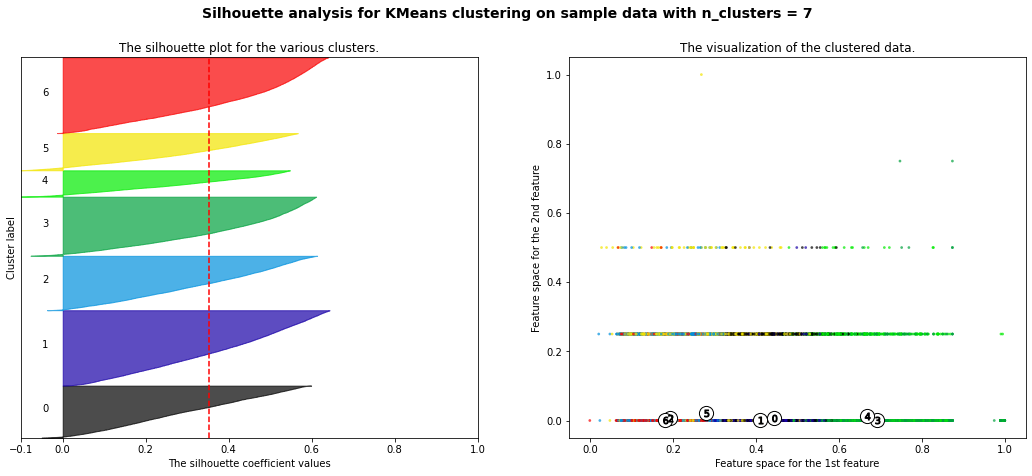

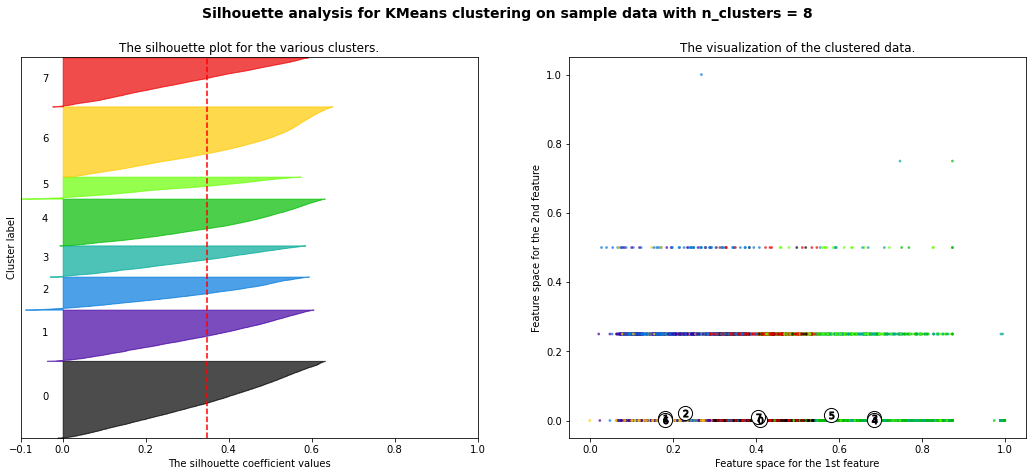

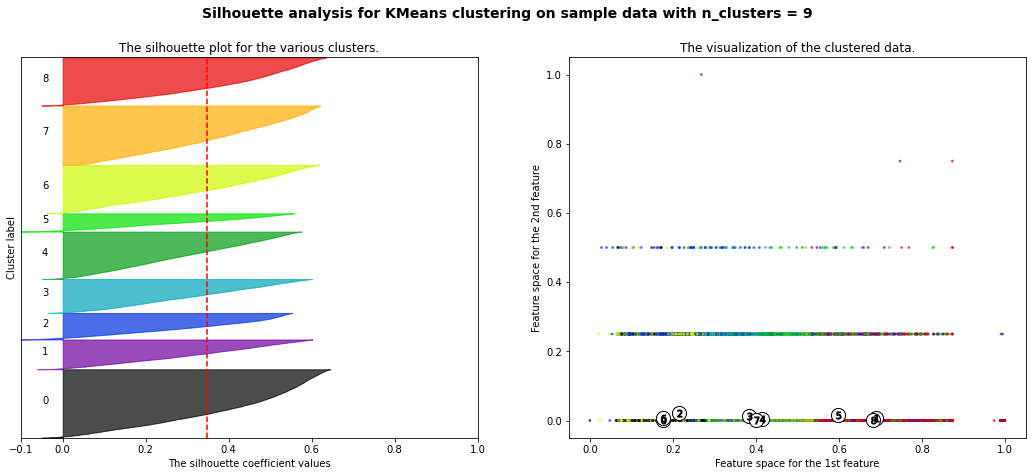

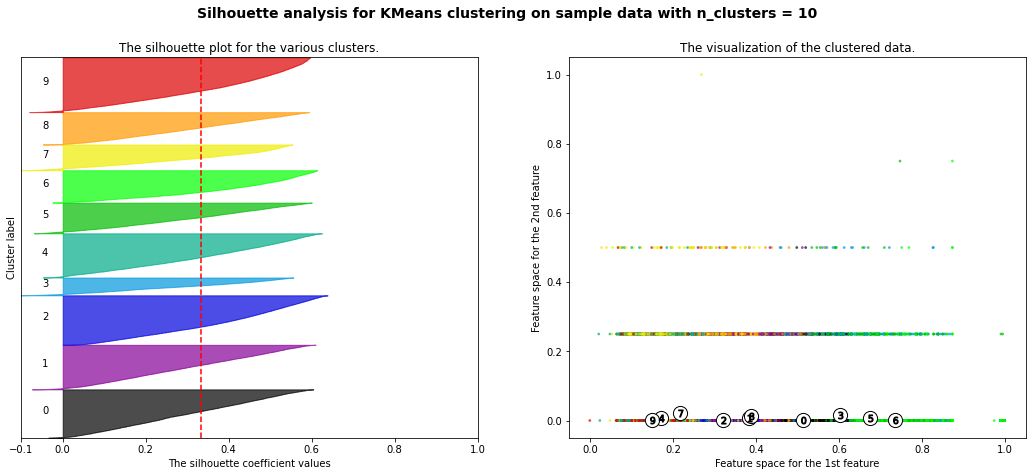

In [ ]:
  silhoutte_analysis(cluster_check,list(range(2,11)))

Based on Elbow method and Silhouette results, we can choose cluster = 3.

#####**Clustering Data**

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3, random_state = 2)
cluster_model.fit(cluster_check)
cluster_label = cluster_model.labels_
cluster_clean['cluster'] = cluster_label
cluster_clean

,customer_unique_id,recency,total_orders,payment_value,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,0
2,0000f46a3911fa3c0805444483337064,585,1,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,2
...,...,...,...,...,...
88470,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32,2
88471,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58,0
88472,ffff371b4d645b6ecea244b27531430a,617,1,112.46,1
88473,ffff5962728ec6157033ef9805bacc48,168,1,133.69,0


In [ ]:
cluster_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86203 entries, 0 to 88474
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  86203 non-null  object 
 1   recency             86203 non-null  int64  
 2   total_orders        86203 non-null  int64  
 3   payment_value       86203 non-null  float64
 4   cluster             86203 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 3.6+ MB


<Figure size 1080x720 with 0 Axes>

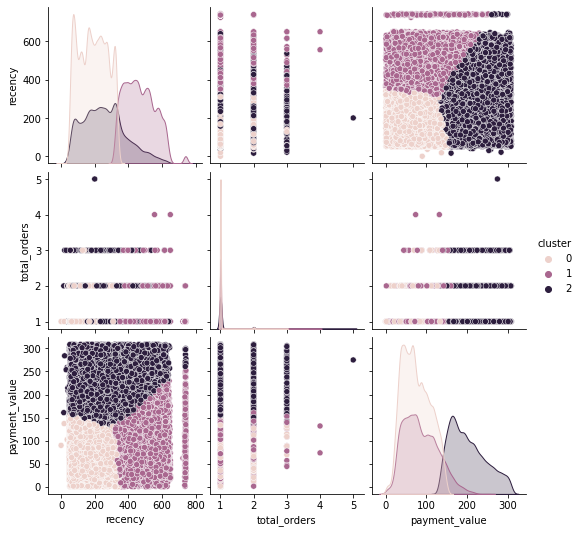

In [ ]:
#Segmentation Details
#Kmeans
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
cluster_clean['cluster'] = kmeans.fit_predict(cluster_clean[['recency', 'payment_value']])

#cluster model
cluster_label = cluster_model.labels_
cluster_clean['cluster'] = cluster_label
cluster_clean['cluster']

#plotting
plt.figure(figsize=(15,10))
sns.pairplot(data=cluster_clean, hue = 'cluster')
plt.show()

**Insight**

Based on the detail consumer segmentation, the variables can be seperated based on `payment_value` and `recency`

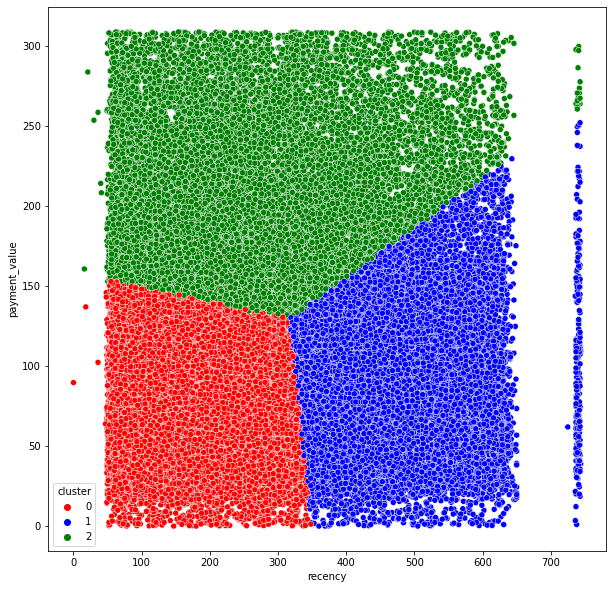

In [ ]:
#Based on payment_value and recency
#Kmeans
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
cluster_clean['cluster'] = kmeans.fit_predict(cluster_clean[['recency', 'payment_value']])

#cluster model
cluster_label = cluster_model.labels_
cluster_clean['cluster'] = cluster_label
cluster_clean['cluster']

#plotting
fig = plt.figure(figsize = (10,10))
colour = ['red', 'blue', 'green']
sns.scatterplot(x='recency', y='payment_value', data = cluster_clean, hue='cluster', palette = colour)

**Insight**

Customer behaviour is well segmented based on the analysis using the `payment_value` and `recency` metrics 

Based on the quantiles for assigning scores for `Recency` and `Monetary`
* cluster 0: groups are 0-33
* cluster 1: groups are 33-66
* cluster 2: groups are 66-100

For `Frequency` it is decided to group them by hand
* score = 1 if the frequency value is 1
* otherwise, the score will be 2

In [ ]:
cluster_clean.groupby('cluster')['recency','total_orders','payment_value'].agg(['count','mean','median','max','min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


recency                              total_orders                   \
          count        mean median  max  min        count      mean median   
cluster                                                                      
0         39065  189.634455  189.0  348    0        39065  1.011647    1.0   
1         24913  467.498976  459.0  744  317        24913  1.015976    1.0   
2         22225  258.857368  250.0  743   16        22225  1.058673    1.0   

                payment_value                                      
        max min         count        mean  median     max     min  
cluster                                                            
0         3   1         39065   74.115317   69.71  153.52    0.01  
1         4   1         24913   85.771797   79.09  252.19    0.01  
2         5   1         22225  202.477270  194.53  308.96  129.91

To sharpen the analysis, manual scoring has been conducted to see if there are more characteristic on the data

In [ ]:
cluster_clean['R_score'] = pd.qcut(cluster_clean['recency'], 3, labels=[1, 2, 3]).astype(str)
cluster_clean['M_score'] = pd.qcut(cluster_clean['payment_value'], 3, labels=[1, 2, 3]).astype(str)
cluster_clean['F_score'] = cluster_clean['total_orders'].apply(lambda x: '1' if x==1 else '2')

cluster_clean['RFM_score'] = cluster_clean['R_score'] + cluster_clean['F_score'] + cluster_clean['M_score']

In [ ]:
def segment(x):
    if x == '123':
        return 'Dolphin'
    elif x in ['311', '312', '313']:
        return 'Seafood'
    elif x in ['111', '112', '113']:
        return 'Shrimps'
    elif x in ['323', '213', '223']:
        return 'Whales'
    elif x in ['221', '222', '321', '322']:
        return 'Orca'
    else:
        return 'Goldfish'

All clusters have similar mean and median of `total_orders` frequency score. Most of the customers are 1 time purchasers. Only few customers with repat purchase in this case.

Due to this condition, we will naming the clusters based on recency score and monetary score (`payment_value`).

By looking at the median value for both metrics, we can see the general characteristics for each cluster are:
* cluster 0: most recent, frequent, revenue generating - core customers that should be considered as most valuable Customer
* cluster 1: gone, one-timers - those Customer are probably gone
* cluster 2: just have joined - new Customer that have joined recently
* cluster 3: most revenue generating - whales that generate revenue
* cluster 4: loyal Customer
* cluster 5: average Customer - just regular customers that don't stand out

We can naming for all clusters as follows:
1. `Dolphin` - most recent, frequent, revenue generating - core customers that should be considered as most valuable Customer
2. `Seafood` - gone, one-timers - those Customer are probably gone
3. `Shrimps` - just have joined - new Customer that have joined recently
4. `Whales` - most revenue generating - whales that generate revenue
5. `Orca` - loyal Customer
6. `Goldfish` - average Customer - just regular customers that don't stand out

In [ ]:
cluster_clean['segments'] = cluster_clean['RFM_score'].apply(segment)
cluster_clean['segments'].value_counts(normalize=True)*100

Seafood     32.519750
Shrimps     32.490749
Goldfish    22.117560
Whales      11.791933
Dolphin      0.604387
Orca         0.475621
Name: segments, dtype: float64

In [ ]:
segmentwise = cluster_clean.groupby('segments').agg(RecencyMean = ('recency', 'mean'),
                                          FrequencyMean = ('total_orders', 'mean'),
                                          MonetaryMean = ('payment_value', 'mean'),
                                          GroupSize = ('recency', 'size'))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Dolphin,121.476008,2.061420,207.387025,521
Goldfish,268.892164,1.011434,70.229046,19066
Orca,376.378049,2.031707,92.440488,410
Seafood,469.027896,1.000000,107.541665,28033
Shrimps,124.854434,1.000000,110.648889,28008
Whales,277.274274,1.094737,190.211426,10165


In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify

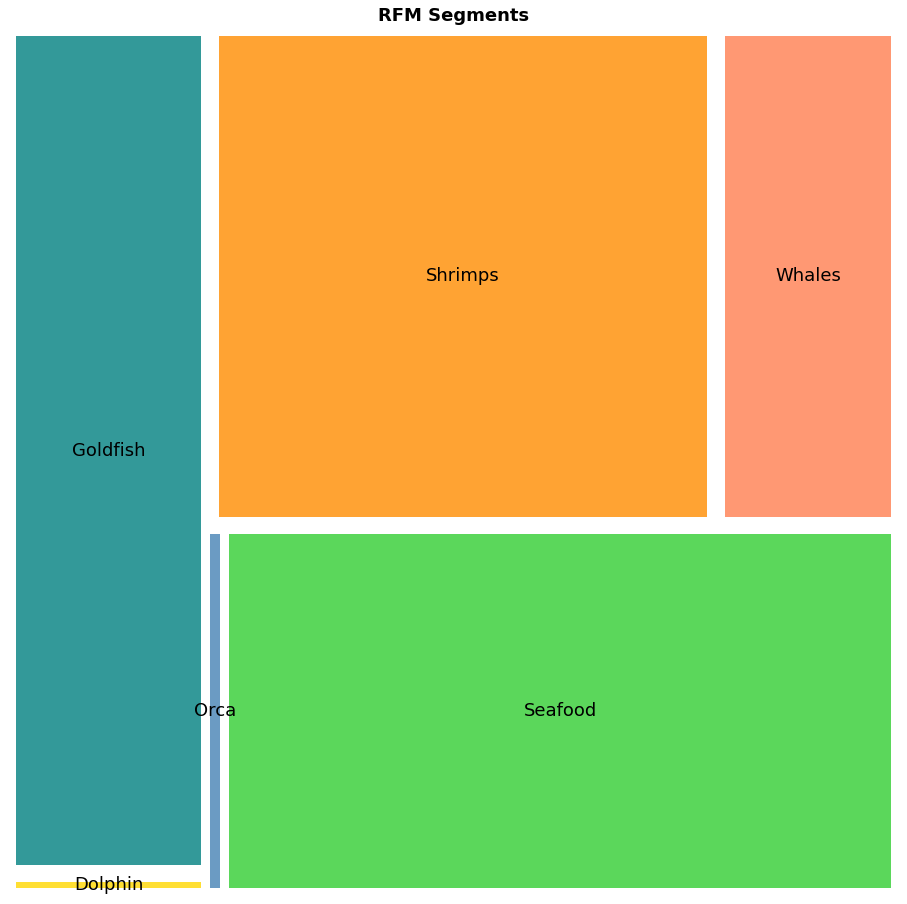

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = segmentwise.index,
              color = ['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral'],
              pad = 2,
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

**Insight**

In-depth analysis conclusion, now the cluster is divided into more segments. The population of the segments are:
* Seafood     32.5% - 28033 Customer
* Shrimps     32.5% - 28008 Customer
* Goldfish    22.1% - 19066 Customer
* Whales      11.8 - 10165 Customer
* Dolphin      0.6% - 521 Customer
* Orca         0.5% - 410 Customer

#**Insight and Recomendation**

By looking at the result of analysis, several insight can be drawn:
1. The cluster is majorly populated with `Seafood` and `Shrimp` respectively by 32.5% and 32.5% with 28k users population
2. `Goldfish` customer has 22.1% population within the population by 19k as regular customer that come and go on regular basis.
3. `Whales` customer has 11.8% population with high spendings as revenue generator
4. `Dolphin` and `Orca` is mainly under 1%. But yet, `Orca` are categorized as Loyal users which means needed to be retained and `Dolphin` are the most recent, frequent, and revenue generating which is this two category is the most valuable customer

Based on the cluster, there are several problems we can find:
1. Gustavo eCommerce churn rate is really high based on `Seafood` clusters by 32.5%
2. But, Gustavo eCommerce has also customer potential based on `Shrimp` cluster by 32.5%
3. Mainly, Gustavo eCommerce is having a **problem in customer retention to make them remains**.

To improve future customer engagement, there are several recomendation to be considered:
1. Gustavo eCommerce needs to give treatment to `Orca` and `Dolphin` customer with **Loyalty Campaign**. As a gratitude giving them Loyalty Campaign, it is expected they will retain and remain loyal to our store.
2. `Whales` customer needs to be treated with **Big spender campaign**. By showing them gratitude for being revenue generator, it is **recommended to give them high cashbacks or discount with the average of their spending on the store**
3. `Goldfish` customers as regular basis, it is needed atleast to keep them retain as customer. A plan to upgrade this customer level is needed, and it is recomended to give this customer **mixed campaign between loyalty and cashbacks as regular and mid-tier spending to keep them retaining**
4. As a new users on Gustavo eCommerce, It is recomended to give `Shrimp` customer **welcome campaign**. It is done with **expectation fast upgrades on this category of customer become at least `Goldfish` not `Seafood`**
5. `Seafood` customer which we are lost can be a lesson to learn what is wrong with the product. As a backup plans for their return, **reactivation campaign** is recomended. For examples, **if they hasn't logged in for 100 days, they will recieve a cashback or discount coupon**  